将原来的py代码修改为notebook中实现，方便调试和数据可视化

In [1]:
%run MyTools.py

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
#load原始CSV数据
print ('Read Data From File')
FILE_DIR='/media/john/10167DFA167DE0E0/TDDOWNLOAD/ML/titanic/officialData'

data_train = pd.read_csv('{0}/train.csv'.format(FILE_DIR))
data_test=pd.read_csv('{0}/test.csv'.format(FILE_DIR))

Read Data From File


/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/dist-packages

Feature Perprocessing
('Function columns_enum_to_int ', 'Sex ', array(['female', 'male'], dtype=object))
('Function columns_enum_to_int ', 'Embarked ', array(['C', 'Q', 'S'], dtype=object))
('Function columns_enum_to_int ', 'Title ', array(['Master', 'Miss', 'Mr', 'Mrs', 'Rare'], dtype=object))
('Function columns_enum_to_int ', 'Fare ', array([Interval(-0.001, 7.75, closed='right'),
       Interval(7.75, 7.8959999999999999, closed='right'),
       Interval(7.8959999999999999, 10.007999999999999, closed='right'),
       Interval(10.007999999999999, 14.454000000000001, closed='right'),
       Interval(14.454000000000001, 24.149999999999999, closed='right'),
       Interval(24.149999999999999, 31.274999999999999, closed='right'),
       Interval(31.274999999999999, 69.549999999999997, closed='right'),
       Interval(69.549999999999997, 512.32899999999995, closed='right')], dtype=object))
    Age     Cabin  Embarked  Fare  Name  Parch  PassengerId  Pclass  Sex  \
0  22.0 -0.420654        

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:107: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


('Function columns_enum_to_int ', 'Age ', array([  0.17      ,   0.33      ,   0.42      ,   0.67      ,
         0.75      ,   0.83      ,   0.92      ,   1.        ,
         2.        ,   3.        ,   3.5177    ,   3.77267   ,
         4.        ,   4.66379167,   5.        ,   5.34413952,
         5.36708333,   5.72012   ,   5.97114095,   6.        ,
         7.        ,   8.        ,   8.26664833,   9.        ,
         9.13067   ,   9.37681   ,   9.719275  ,  10.        ,
        11.        ,  11.5       ,  11.5571    ,  12.        ,
        12.43725   ,  13.        ,  13.41057833,  14.        ,
        14.5       ,  14.86929202,  14.875025  ,  15.        ,
        16.        ,  16.19526   ,  16.5305    ,  17.        ,
        18.        ,  18.11981071,  18.269625  ,  18.47276012,
        18.5       ,  18.96092024,  19.        ,  19.00726905,
        19.74644921,  19.96320714,  20.        ,  20.17110595,
        20.30708095,  20.42150687,  20.5       ,  20.5115496 ,
        20.64

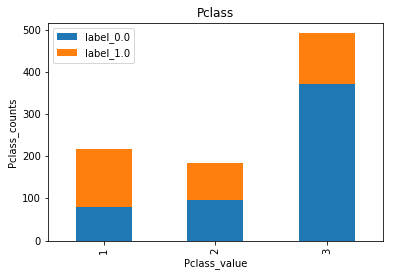

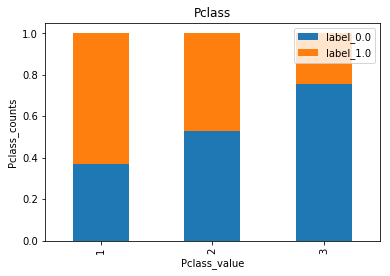

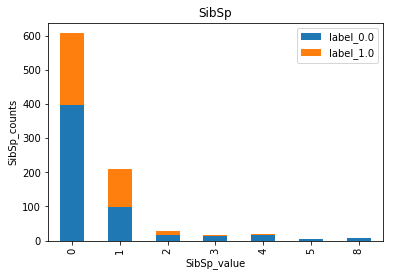

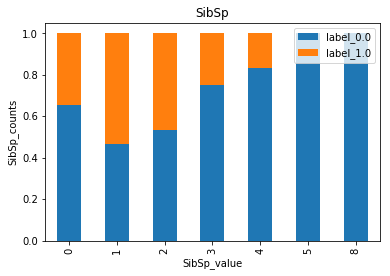

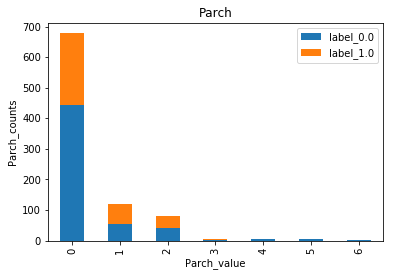

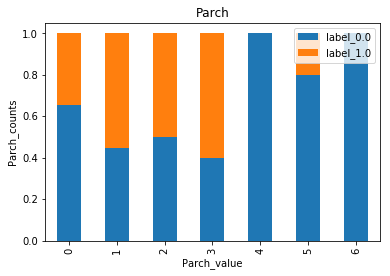

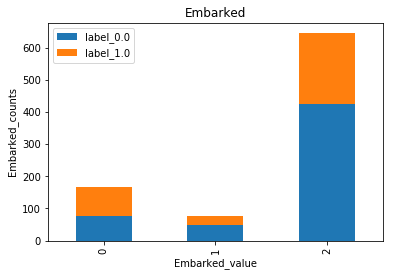

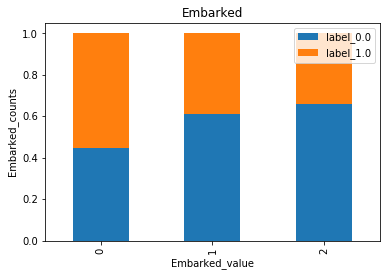

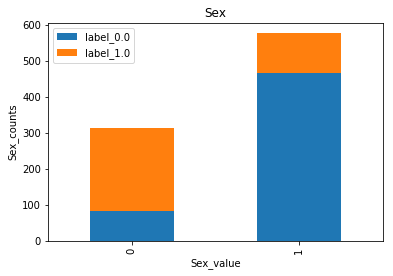

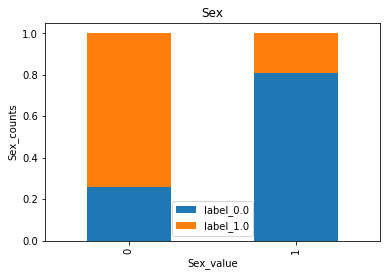

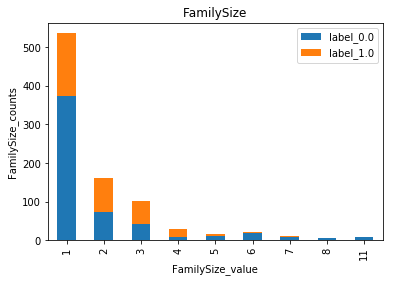

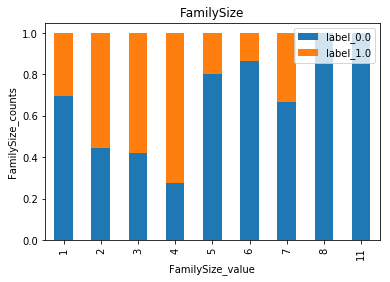

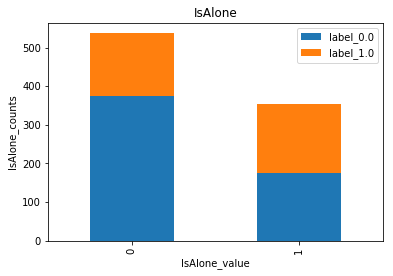

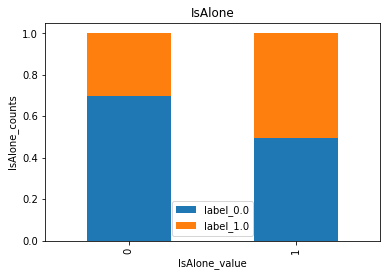

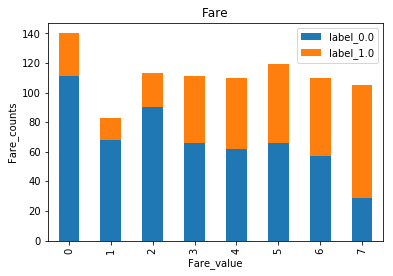

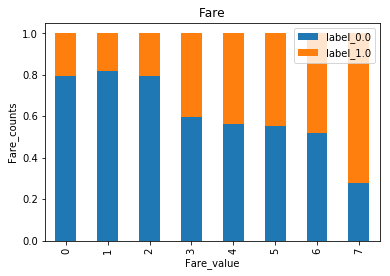

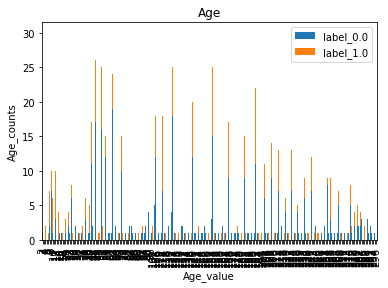

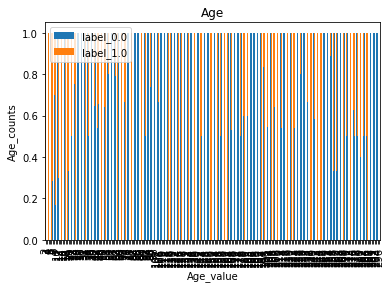

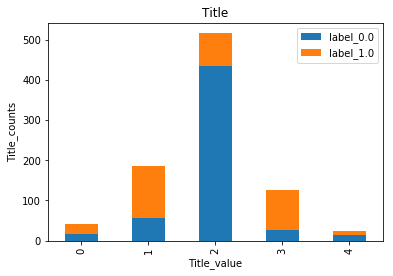

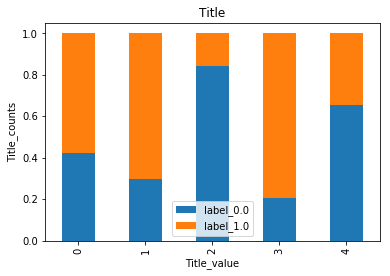

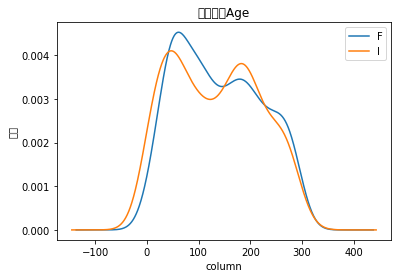

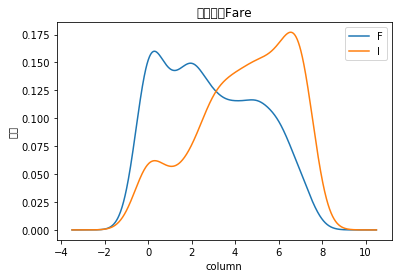

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


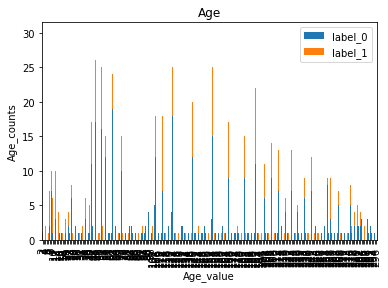

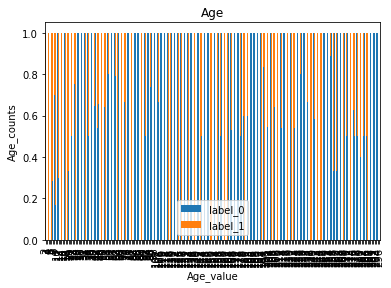

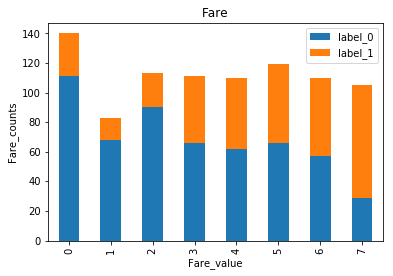

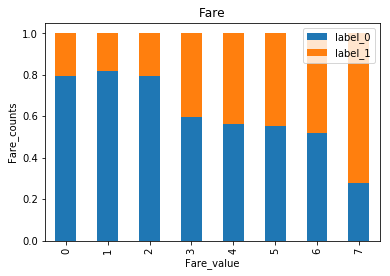

In [3]:
import re as re
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
print ('Feature Perprocessing')

train_passengerId=data_train['PassengerId']
test_passengerId=data_test['PassengerId']
data_full=data_train.append(data_test, ignore_index=True)

# print full_data.shape
# print full_data.head()
# print full_data.tail()
data_full['SibSp']=data_full['SibSp'].fillna(0)
data_full['Parch']=data_full['Parch'].fillna(0)
data_full['FamilySize'] = data_full['SibSp'] + data_full['Parch'] + 1
data_full['IsAlone'] = data_full.apply(lambda x:0 if x['FamilySize']==1 else 1,axis=1)
data_full['Embarked'] = data_full['Embarked'].fillna('S')
data_full['Fare'] = data_full['Fare'].fillna(data_train['Fare'].median())
data_full['Fare'] = pd.qcut(data_full['Fare'], 8)


def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

data_full['Title'] = data_full['Name'].apply(get_title)
data_full['Title'] = data_full['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare').replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs')
data_full['Title'] = data_full['Title'].fillna(0)
data_full['Name'] = data_full['Name'].apply(len)

#todo
#Cabin有很多缺省值  
#发现是否缺省对结果影响很大  
#同时参数贡献度不够的说明划分不够细  
#能代表着一些隐含信息。比如船舱号Cabin这一属性，缺失可能代表并没有船舱  
#发现字母跟等级有关  
def getCabinLetter(cabin):  
    match = re.compile("([a-zA-Z]+)").search(cabin)  
    if match:  
        return  match.group()  
    else:  
        return 'U'  
  
def getCabinNumber(cabin):  
    match = re.compile("([0-9]+)").search(cabin)  
    if match:  
        return match.group()  
    else:  
        return 0  

data_full['Cabin'][data_full.Cabin.isnull()] = 'U0'  
data_full['CabinLetter'] = data_full['Cabin'].map(lambda x:getCabinLetter(x))  
data_full['CabinLetter'] = pd.factorize(data_full['CabinLetter'])[0]  
data_full['CabinNumber'] = data_full['Cabin'].map(lambda x:getCabinNumber(x)).astype(int) + 1 #0太多  
#std比较大所以我们要标准化  
sclar = preprocessing.StandardScaler()  
data_full['Cabin'] = sclar.fit_transform(data_full['CabinNumber'] .reshape(-1,1) )

# data_full['Cabin'] = data_full["Cabin"].apply(lambda x: 0 if type(x) == float else 1)


import re  
def getTicketPrefix(ticket):  
    match = re.compile("([a-zA-Z\.\/]+)").search(ticket)  
    if match:#有前缀  
        return match.group()  
    else:#没有前缀  
        return 'U'  
  
#获取票的数字  
def getTicketNumber(ticket):  
    match = re.compile("([0-9]+$)").search(ticket)  
    if match:  
        return  match.group()  
    else:  
        return '0'  
  

data_full['TicketPrefix'] = data_full['Ticket'].map(lambda x: getTicketPrefix(x.upper()))  
data_full['TicketPrefix'] = data_full['TicketPrefix'].map(lambda x: re.sub('[\.?\/?]', '', x))  # 去掉./  
data_full['TicketPrefix'] = data_full['TicketPrefix'].map(lambda x: re.sub('STON', 'SOTON', x))  
data_full['TicketPrefix'] = pd.factorize(data_full['TicketPrefix'])[0]  

data_full['TicketNumber'] = data_full['Ticket'].map(lambda x: getTicketNumber(x))  
data_full['TicketNumberLength'] = data_full['TicketNumber'].map(lambda x: len(x)). astype(int)  
data_full['TicketNumberStart'] = data_full['TicketNumber'].map(lambda x: x[0:1]).astype(int)  
data_full['TicketNumber'] = data_full['TicketNumber'].astype(int)  
#有可能跟票号有关系但是这个数显然不是标准属性  
scaler = preprocessing.StandardScaler()  
data_full['TicketNumber'] = scaler.fit_transform(data_full['TicketNumber'].reshape(-1,1))


FeatureEngineerTools.columns_enum_to_int(data_train=data_full,columns=['Sex','Embarked','Title','Fare'])
# data_full['Age'] = data_full['Age'].astype(int)
# data_full['Age'] = pd.qcut(data_full['Age'], 5)
# data_full['Age'] = data_full['Age'].fillna(data_train['Age'].median())

# #Age使用随机森林进行预测
print data_full.head(3)
data_full,algo=FeatureEngineerTools.columns_set_missing_label(data_full,\
                columns=['Cabin','Embarked','Fare','Name' ,'Parch','Pclass' ,'Sex','SibSp','FamilySize','IsAlone','Title'],label='Age',algo=RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1))

# data_full['Age'] = pd.cut(data_full['Age'],8)
data_full['Age_scaled'] = scaler.fit_transform(data_full['Age'].reshape(-1,1))

FeatureEngineerTools.columns_enum_to_int(data_train=data_full,columns=['Age'])

data_train=data_full[data_full['PassengerId'].isin(train_passengerId)]
data_test=data_full[data_full['PassengerId'].isin(test_passengerId)]
print data_train.head(1)
print data_test.head(1)

#属性和分类目标的相关性
columns=['Pclass','SibSp','Parch','Embarked','Sex','FamilySize','IsAlone','Fare','Age','Title']
label='Survived'
for column in columns:
    FeatureEngineerTools.show_corr_disper_label(data_train,column,label)

columns=['Age','Fare']
label='Survived'
for column in columns:
    FeatureEngineerTools.show_corr_contin_label(data_train,column,label)

for column in columns:
    FeatureEngineerTools.show_corr_int_label(data_train,column,label)


Feature Relevance And Selection
   Age     Cabin  Embarked  Fare  Name  Parch  Pclass  Sex  SibSp  Survived  \
0   66 -0.420654         2     0    23      0       3    1      1         0   
1  201  2.843455         0     7    51      0       1    0      1         1   
2  105 -0.420654         2     2    22      0       3    0      0         1   

   FamilySize  IsAlone  Title  CabinLetter  CabinNumber  TicketPrefix  \
0           2        1      2            0            1             0   
1           2        1      3            1           86             1   
2           1        0      1            0            1             2   

   TicketNumber  TicketNumberLength  TicketNumberStart  Age_scaled  
0     -0.412343                   5                  2   -0.583138  
1     -0.417967                   5                  1    0.583843  
2      4.437068                   7                  3   -0.291393  
     Age     Cabin  Embarked  Fare  Name  Parch  Pclass  Sex  SibSp  Survived  \
8

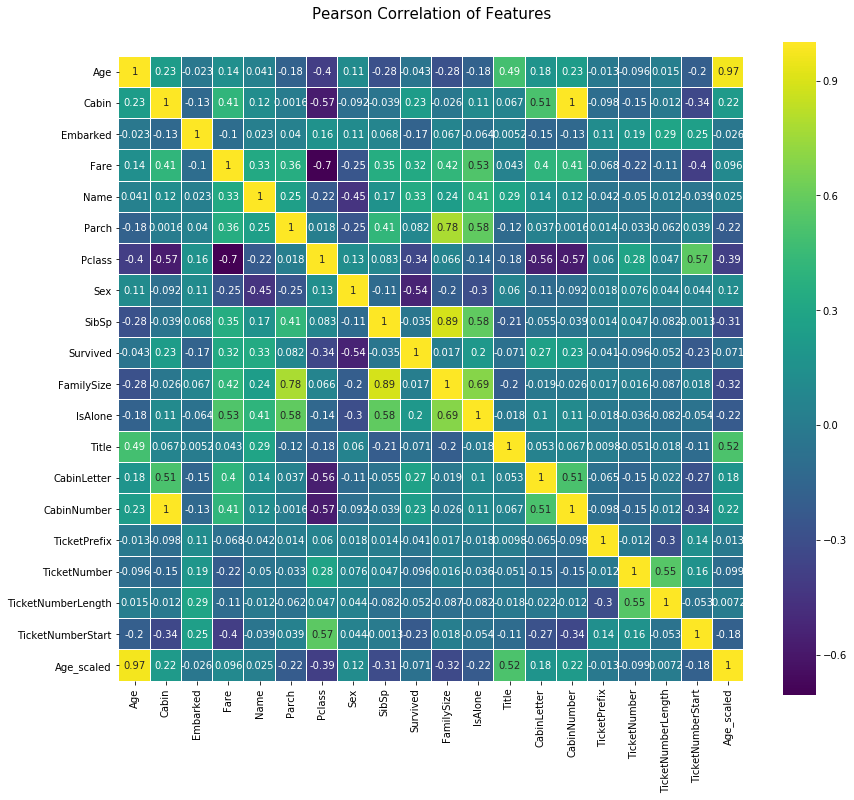

In [4]:
#todo
#数据规约和降低维度  
# 数据规约维度 PCA+ KMeans  
# 但仍接近于保持原始数据的完整性。也就是说，在归约后的数据集上进行数据挖掘将更加有效，仍然产生几乎相同的数据分析结果。  
# PCA通过创建一个替换的较小的变量集组合属性的基本要素  
# 规约有属性和数值  

#特征提取降低维度  
from sklearn.decomposition import PCA 

def processDrops(df,columns=[]):  
    '''标准化过的属性会在后续协方差中删除.
    
    '''
    if not any(columns):
        columns = df.columns.value

    #发现排除survived 和passengerId以后的子列  
    df_corr = df[columns].corr(method='spearman')  
    mask = np.ones(df_corr.columns.size) - np.eye(df_corr.columns.size)#默认中间为0相当于跟自己无关  
    df_corr = mask * df_corr#乘是对应元素乘  
    #得到整体的协方差矩阵  
  
    #赛选出相关性太高的属性冗杂属性  
    drops = []  
    for col in df_corr.columns.values:  
        if np.in1d([col],drops):#已经有了  
            continue  
        corr = df_corr[abs(df_corr[col]) > 0.98].index#第col列中相关性太大的舍弃  
        drops = np.union1d(drops, corr)  
    print("\nDropping", drops.shape[0], "highly correlated features...\n")# , drops  
    return  df.drop(drops,axis=1) 


print ('Feature Relevance And Selection')
drop_elements = ['PassengerId', 'Ticket']
data_train_org=data_train.copy()
data_test_org=data_test.copy()
data_train = data_train.drop(drop_elements, axis = 1)
data_test  = data_test.drop(drop_elements, axis = 1)

y_train = data_train[label].values
x_train=data_train.drop(label,axis=1).values
x_test = data_test.drop(label,axis=1).values


print data_train.head(3)
print data_test.head(3)
FeatureEngineerTools.heatmap(data_train)

# #使用pca进行维度简化
pca = PCA(n_components=0.99)
X_transformed = pca.fit_transform(x_train,y_train)  
# Create a data frame from the PCA'd data  
data_train = pd.DataFrame(X_transformed)
data_test= pd.DataFrame(pca.transform(x_test))
x_train=data_train.values
x_test=data_test.values


In [5]:
print len(x_train),len(x_train[0])
print len(x_test),len(x_test[0])

891 3
418 3


In [6]:
print ('Classifiers Score')
label='Survived'

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]


acc_dict=AlgoAssemTools.eval_clfs_accuracy_score(classifiers,x_train,y_train,10)
log_df=pd.DataFrame({'classifier':acc_dict.keys(),'acc_score':acc_dict.values()})
log_df['classifier_name']=log_df['classifier'].apply(lambda x:x.__class__.__name__)
log_df=log_df.sort_values(['acc_score'],ascending=False)
print 'Top 5 Classifier ',log_df['classifier_name'].head(5)

# plt.xlabel('acc_score')
# plt.title('classifier acc_score')
# sns.set_color_codes("muted")
# sns.barplot(x='acc_score', y='classifier_name', data=log_df, color="b")

Classifiers Score
Top 5 Classifier  7       GradientBoostingClassifier
0               LogisticRegression
4           RandomForestClassifier
2       LinearDiscriminantAnalysis
5    QuadraticDiscriminantAnalysis
Name: classifier_name, dtype: object


In [7]:
print ('Choose Best Classifier And Predict')
for i in range(0,5):
    candidate_classifier = log_df.iloc[i]['classifier']
    acc_score=log_df.iloc[i]['acc_score']
    candidate_classifier.fit(x_train, y_train)
    result = candidate_classifier.predict(x_test)
    data_test_org['Survived']=result
    data_test_org[['PassengerId','Survived']].to_csv("{3}/result_{0}_{1}_{2}.csv".format( \
        i,candidate_classifier.__class__.__name__,int(acc_score*10000),FILE_DIR),index=False)

Choose Best Classifier And Predict


In [8]:

# todo
# g = sns.pairplot(data_train[[u'Survived', u'Pclass', u'Sex', u'Age',  u'Fare', u'Embarked',
#        u'Title']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
# g.set(xticklabels=[])

In [9]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import ExtraTreesClassifier

print ('Feature Importance (Mean Multi Classifier)')


# Create 5 objects that represent our 4 models
rf = RandomForestClassifier(n_jobs= -1,
    n_estimators= 500,
     warm_start= True, 
     #max_features= 0.2,
    max_depth= 6,
    min_samples_leaf= 2,
    max_features = 'sqrt',
    verbose= 0)
et = ExtraTreesClassifier( n_jobs= -1,
    n_estimators=500,
    #max_features= 0.5,
    max_depth= 8,
    min_samples_leaf= 2,
    verbose= 0)
ada = AdaBoostClassifier(    n_estimators=500,
    learning_rate = 0.75)
gb = GradientBoostingClassifier(n_estimators= 500,
     #max_features= 0.2,
    max_depth=5,
    min_samples_leaf= 2,
    verbose= 0)
svc = SVC(  kernel = 'linear',
    C = 0.025)

rf_features=rf.fit(x_train,y_train).feature_importances_
et_features=et.fit(x_train, y_train).feature_importances_
ada_features=ada.fit(x_train, y_train).feature_importances_
gb_features=gb.fit(x_train,y_train).feature_importances_

if 'Survived' in data_train.columns:
    cols = data_train.drop('Survived',axis=1).columns.values
else:
    cols = data_train.columns.values

print len(cols),cols
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })
feature_dataframe.set_index('features')
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe=feature_dataframe.sort_values(['mean'],ascending=False)
print feature_dataframe.head(3)

Feature Importance (Mean Multi Classifier)
3 [0 1 2]
   AdaBoost feature importances  Extra Trees  feature importances  \
2                         0.296                          0.378733   
1                         0.350                          0.362411   
0                         0.354                          0.142856   

   Gradient Boost feature importances  Random Forest feature importances  \
2                            0.352041                           0.382925   
1                            0.324495                           0.386743   
0                            0.323464                           0.230332   

   features     mean  
2         2  0.68194  
1         1  0.48473  
0         0  0.21013  


In [10]:
# base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
#      'ExtraTrees': et_oof_train.ravel(),
#      'AdaBoost': ada_oof_train.ravel(),
#       'GradientBoost': gb_oof_train.ravel()
#     })

print ('Classifiers Ensemble Choose Classifier Result To Second Train')
print ('Use The Result Of Top 5 Classifier As Input Of Second Train')
#扩展为所有分类器打结果融合
second_predictions_train=pd.DataFrame()
second_predictions_test=pd.DataFrame()
for i in range(0,5):
    candidate_classifier = log_df.iloc[i]['classifier']
    name=candidate_classifier.__class__.__name__
    print ('start:',name)
    clf_oof_train,clf_oof_test=AlgoAssemTools.get_oof(candidate_classifier,x_train, y_train, x_test)
    second_predictions_train[name]=pd.Series(clf_oof_train.reshape(-1))
    second_predictions_test[name]=pd.Series(clf_oof_test.reshape(-1))
    
print second_predictions_train.head(2)
print second_predictions_test.head(2)

Classifiers Ensemble Choose Classifier Result To Second Train
Use The Result Of Top 5 Classifier As Input Of Second Train
('start:', 'GradientBoostingClassifier')
('start:', 'LogisticRegression')
('start:', 'RandomForestClassifier')
('start:', 'LinearDiscriminantAnalysis')
('start:', 'QuadraticDiscriminantAnalysis')
   GradientBoostingClassifier  LogisticRegression  RandomForestClassifier  \
0                         0.0                 0.0                     0.0   
1                         1.0                 1.0                     1.0   

   LinearDiscriminantAnalysis  QuadraticDiscriminantAnalysis  
0                         0.0                            0.0  
1                         1.0                            1.0  
   GradientBoostingClassifier  LogisticRegression  RandomForestClassifier  \
0                         0.0                 0.0                     0.0   
1                         0.0                 0.0                     0.0   

   LinearDiscriminantAnalysis

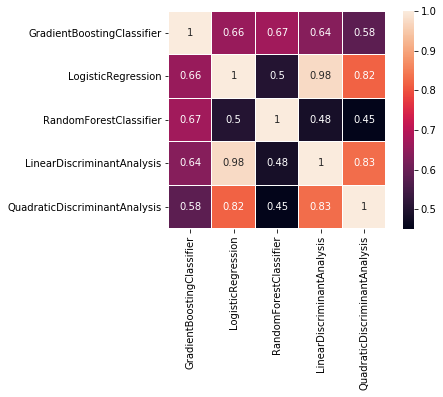

In [11]:
# data = [
#     go.Heatmap(
#         z= base_predictions_train.astype(float).corr().values ,
#         x=base_predictions_train.columns.values,
#         y= base_predictions_train.columns.values,
#           colorscale='Viridis',
#             showscale=True,
#             reversescale = True
#     )
# ]
# py.iplot(data, filename='labelled-heatmap')

sns.heatmap(second_predictions_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True)

In [12]:
import xgboost as xgb
print ('Choose Best Ensemble Classifier')

classifiers = [
    xgb.XGBClassifier(
    #learning_rate = 0.02,
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     #gamma=1,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread= -1,
     scale_pos_weight=1),
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
x_train=second_predictions_train.values
x_test=second_predictions_test.values
acc_dict=AlgoAssemTools.eval_clfs_accuracy_score(classifiers,x_train,y_train)
log_df=pd.DataFrame({'classifier':acc_dict.keys(),'acc_score':acc_dict.values()})
log_df['classifier_name']=log_df['classifier'].apply(lambda x:x.__class__.__name__)
log_df=log_df.sort_values(['acc_score'],ascending=False)
print 'Top 3 Classifier '
print log_df['classifier_name'].head(3)


Choose Best Ensemble Classifier
Top 3 Classifier 
7     RandomForestClassifier
10                GaussianNB
1              XGBClassifier
Name: classifier_name, dtype: object


In [13]:
# Generate Submission File 
print ('Best Ensemble Classifier Results')
for i in range(0,3):
    candidate_classifier = log_df.iloc[i]['classifier']
    acc_score=log_df.iloc[i]['acc_score']
    print ('start:',candidate_classifier.__class__.__name__)
    predictions=candidate_classifier.fit(x_train,y_train).predict(x_test)
    data_test_org['Survived']=predictions
    data_test_org[['PassengerId','Survived']].to_csv("{3}/ensembleResultT_{0}_{1}_{2}.csv".format( \
        i,candidate_classifier.__class__.__name__,int(acc_score*10000),FILE_DIR),index=False)


Best Ensemble Classifier Results
('start:', 'RandomForestClassifier')
('start:', 'GaussianNB')
('start:', 'XGBClassifier')


In [14]:
from sklearn import linear_model

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
# clf.fit(X, y)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(x_train,y_train)
predictions = bagging_clf.predict(x_test)
result = pd.DataFrame({'PassengerId':data_test_org['PassengerId'], 'Survived':predictions.astype(np.int32)})
result.to_csv("{0}/logistic_regression_predictions.csv".format(FILE_DIR), index=False)


In [15]:
# print list(train_df.columns)
# print pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

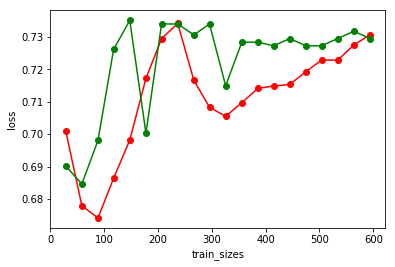

In [16]:
#判断是否过拟合
train_sizes,train_loss,test_loss=learning_curve(clf,x_train,y_train,train_sizes=np.linspace(0.05,1,20))

train_loss_mean=np.mean(train_loss,axis=1)
test_loss_mean=np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',color='r',label='train_loss_mean')
plt.plot(train_sizes,test_loss_mean,'o-',color='g',label='test_loss_mean')
plt.xlabel('train_sizes')
plt.ylabel('loss')
plt.show()